# Project 2

# Used Vehicle Price Prediction

- Andrés Felipe Botero

- Diego Alejandro Díaz

- Juliana López Botero

- Carolina Niño Gutiérrez

## Introduction

1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: data
Each observation represents the price of an used car

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline


- Cargamos la base

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/dataTrain_carListings.zip')


Mounted at /content/drive


# Revisamos las dimesiones de nuestra data

In [3]:
data.shape

(500000, 6)

In [4]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


(<matplotlib.axes._subplots.AxesSubplot at 0x7f10c4611990>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f10c45b0110>)

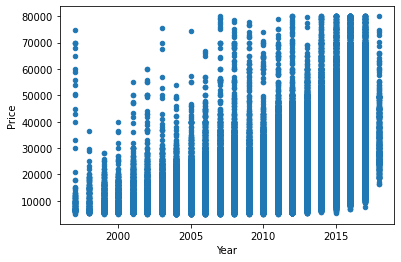

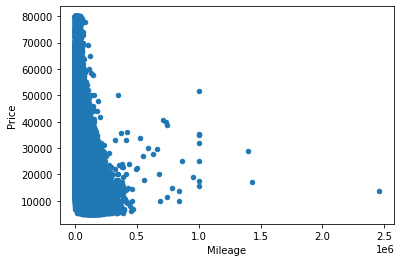

In [5]:
data.plot(kind='scatter', y='Price', x='Year'), data.plot(kind='scatter', y='Price', x='Mileage')

Realizado un análisis descriptivo rápido, evidenciamos que en cuanto el año del vehículo sea mayor, así mismo será su precio

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of - the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process.

### Se evaluará el rendimiento de los modelos usando CrossValidation k=10 manualmente

# 1. Creación de variables dummies para nuestras variables categoricas (STATE, MAKE y MODEL)

In [6]:
data2 = pd.get_dummies(data[['State','Make','Model']])
dataf= pd.concat([data,data2],axis=1)

In [7]:
dataf.shape

(500000, 620)

Dado que se generaron tantas Dummies (620 variables en total) es un numero muy alto para correr el modelo y por capacidad no funciona, así que realizaremos la agrupación de las variables por mayor imporancia.

Con el siguiente codigo conseguiremos identificar la importancia mayor o igual a 85% de cada una de las categorias de las variables y posteriormente se eliminarán las menores.

In [8]:
df1 = dataf['State'].value_counts().to_frame()
df1["acum_1"] = df1["State"].cumsum()/df1["State"].sum()*100
s_list=list(df1[df1['acum_1']<=85].index)
dataf['State_new']=np.where(dataf['State'].isin(s_list),dataf['State'],"OTRO")

df2 = dataf['Make'].value_counts().to_frame()
df2["acum_1"] = df2["Make"].cumsum()/df2["Make"].sum()*100
m_list=list(df2[df2['acum_1']<=85].index)
dataf['Make_new']=np.where(dataf['Make'].isin(m_list),dataf['Make'],"OTRO")

df3 = dataf['Model'].value_counts().to_frame()
df3["acum_1"] = df3["Model"].cumsum()/df3["Model"].sum()*100
mo_list=list(df3[df3['acum_1']<=85].index)
dataf['Model_new']=np.where(dataf['Model'].isin(mo_list),dataf['Model'],"OTRO")

Se revisa cada data frame para identificar las que menos importancia tienen para posteriormente eliminarlas como se indicó anteriormente


In [9]:
pd.options.display.max_rows=1000
#df1
#df2
#df3


In [10]:
dataf

,Price,Year,Mileage,State,Make,Model,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,State_ DC,State_ DE,State_ FL,State_ GA,State_ HI,State_ IA,State_ ID,State_ IL,State_ IN,State_ KS,State_ KY,State_ LA,State_ MA,State_ MD,State_ ME,State_ MI,State_ MN,State_ MO,State_ MS,State_ MT,State_ NC,State_ ND,State_ NE,State_ NH,State_ NJ,State_ NM,State_ NV,...,Model_WRXSTI,Model_Wrangler,Model_Wrangler2dr,Model_Wrangler4WD,Model_WranglerRubicon,Model_WranglerSahara,Model_WranglerSport,Model_WranglerX,Model_X1xDrive28i,Model_X3AWD,Model_X3xDrive28i,Model_X5AWD,Model_X5xDrive35i,Model_XC60AWD,Model_XC60FWD,Model_XC60T6,Model_XC704dr,Model_XC90AWD,Model_XC90FWD,Model_XC90T6,Model_XF4dr,Model_XJ4dr,Model_XK2dr,Model_Xterra2WD,Model_Xterra4WD,Model_Xterra4dr,Model_Yaris,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr,State_new,Make_new,Model_new
0,21490,2014,31909,MD,Nissan,MuranoAWD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,MD,OTRO,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OTRO,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OTRO,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TN,Jeep,Wrangler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,16997,2013,40393,TX,BMW,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TX,BMW,OTRO
499996,11990,2012,91794,WA,Hyundai,Santa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,WA,Hyundai,Santa
499997,49991,2014,39107,MS,Ford,Super,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OTRO,Ford,Super
499998,21888,2010,62556,NH,Dodge,Ram,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,OTRO,Dodge,Ram


Se procede a eliminar aquellas variables dummies que tienen importancia menor o igual  85%.

In [12]:
dataf.drop(['State_new','Make_new','Model_new','State','Make','Model'], inplace=True, axis=1)


In [13]:
dataf.drop(["State_ TX",
"State_ CA",
"State_ FL",
"State_ GA",
"State_ NC",
"State_ IL",
"State_ VA",
"State_ PA",
"State_ NY",
"State_ NJ",
"State_ OH",
"State_ CO",
"State_ WA",
"State_ AZ",
"State_ TN",
"State_ MA",
"State_ MD",
"State_ MO",
"State_ IN",
"State_ KY",
"State_ AL",
"State_ WI",
"State_ MN",
"State_ MI",
"State_ OK",
"Make_Ford",
"Make_Chevrolet",
"Make_Toyota",
"Make_Honda",
"Make_Jeep",
"Make_GMC",
"Make_Kia",
"Make_Dodge",
"Make_Hyundai",
"Make_Lexus",
"Make_BMW",
"Make_Volkswagen",
"Model_Silverado",
"Model_Grand",
"Model_Sierra",
"Model_Accord",
"Model_F-1504WD",
"Model_Wrangler",
"Model_Civic",
"Model_3",
"Model_Jetta",
"Model_Santa",
"Model_FusionSE",
"Model_EquinoxFWD",
"Model_CamrySE",
"Model_Super",
"Model_CorollaLE",
"Model_MalibuLT",
"Model_F-150XLT",
"Model_Town",
"Model_Ram",
"Model_CamaroCoupe",
"Model_Cooper",
"Model_SorentoLX",
"Model_ExplorerXLT",
"Model_Rover",
"Model_OptimaLX",
"Model_EscapeSE",
"Model_5",
"Model_Tundra",
"Model_RX",
"Model_EquinoxAWD",
"Model_F-1502WD",
"Model_CamryLE",
"Model_CR-VEX-L",
"Model_Passat4dr",
"Model_TerrainFWD",
"Model_CruzeSedan",
"Model_Elantra4dr",
"Model_Outback2.5i",
"Model_CorollaS",
"Model_200Limited",
"Model_EscapeFWD",
"Model_EdgeSEL",
"Model_AcadiaFWD",
"Model_ES",
"Model_E-ClassE350",
"Model_FocusSE",
"Model_Tahoe4WD",
"Model_Sonata4dr",
"Model_AcadiaAWD",
"Model_CTS",
"Model_CR-VLX",
"Model_IS",
"Model_OdysseyEX-L",
"Model_C-ClassC300",
"Model_MuranoAWD",
"Model_Camry4dr",
"Model_Yukon",
"Model_TraverseFWD",
"Model_CR-VEX",
"Model_Tacoma4WD",
"Model_Escape4WD",
"Model_CivicLX",
"Model_PatriotSport",
"Model_Malibu1LT",
"Model_G37",
"Model_Altima4dr",
"Model_Tacoma2WD",
"Model_RXRX",
"Model_Tahoe2WD",
"Model_ExplorerLimited",
"Model_Transit",
"Model_MalibuLS",
"Model_TerrainAWD",
"Model_EnclaveLeather",
"Model_PilotEX-L",
"Model_F-150Lariat",
"Model_Impreza",
"Model_Suburban4WD",
"Model_SRXLuxury",
"Model_Prius",
"Model_25004WD",
"Model_Yukon4WD",
"Model_Explorer4WD",
"Model_AccordEX-L",
"Model_Soul+",
"Model_CompassSport",
"Model_OptimaEX",
"Model_TraverseAWD",
"Model_F-150SuperCrew",
"Model_Legacy2.5i",
"Model_SedonaLX",
"Model_ForteLX",
"Model_Mustang2dr",
"Model_CamryXLE",
"Model_CorollaL",
"Model_MustangGT",
"Model_CherokeeLimited",
"Model_LaCrosseFWD",
"Model_SonataSE",
"Model_PatriotLatitude",
"Model_ChallengerR/T",
"Model_M-ClassML350",
"Model_ChargerSXT",
"Model_Fusion4dr",
"Model_JourneySXT",
"Model_Express",
"Model_ESES",
"Model_JourneyFWD",
"Model_Corvette2dr",
"Model_F-150XL",
"Model_Golf",
"Model_Wrangler4WD",
"Model_15004WD",
"Model_ColoradoCrew",
"Model_CompassLatitude",
"Model_Corolla4dr",
"Model_RAV4XLE",
"Model_ImpalaLT",
"Model_AccordLX",
"Model_SportageLX",
"Model_ISIS",
"Model_SonataLimited",
"Model_TacomaBase",
"Model_Suburban2WD",
"Model_WranglerSport",
"Model_C-ClassC",
"Model_PriusTwo",
"Model_Elantra",
"Model_300300C",
"Model_Malibu",
"Model_Yukon2WD",
"Model_C-Class4dr",
"Model_Escalade",
"Model_TahoeLT",
"Model_X3xDrive28i",
"Model_CR-V4WD",
"Model_Charger4dr",
"Model_Outlander",
"Model_Malibu4dr",
"Model_TucsonFWD",
"Model_MDXAWD",
"Model_SonicSedan",
"Model_GS",
"Model_EdgeLimited",
"Model_SiennaXLE",
"Model_Camaro2dr",
"Model_RAV4LE",
"Model_Expedition",
"Model_Pilot4WD",
"Model_OdysseyTouring",
"Model_Murano2WD",
"Model_FusionHybrid",
"Model_7",
"Model_4Runner4WD",
"Model_Impala4dr",
"Model_CamaroConvertible",
"Model_ElantraLimited",
"Model_TundraSR5",
"Model_Challenger2dr",
"Model_4RunnerSR5",
"Model_ChargerSE",
"Model_Prius5dr",
"Model_AvalonXLE",
"Model_HighlanderFWD",
"Model_GX",
"Model_DurangoAWD",
"Model_Maxima4dr",
"Model_Sienna5dr",
"Model_RAV4Limited",
"Model_X5xDrive35i",
"Model_CivicEX",
"Model_ExplorerFWD",
"Model_Econoline",
"Model_TaurusSEL",
"Model_Pathfinder4WD",
"Model_X5AWD",
"Model_PriusThree",
"Model_Camry",
"Model_RAV44WD",
"Model_FJ",
"Model_EnclavePremium",
"Model_RAV4FWD",
"Model_3004dr",
"Model_300300S",
"Model_Sentra4dr",
"Model_TacomaPreRunner",
"Model_HighlanderLimited",
"Model_200S",
"Model_Focus4dr",
"Model_SiennaLE",
"Model_F-150FX4",
"Model_CC4dr",
"Model_CamryL",
"Model_PilotTouring",
"Model_OptimaSX",
"Model_GSGS",
"Model_RDXAWD",
"Model_MustangBase",
"Model_SorentoEX",
"Model_SoulBase",
"Model_FlexSEL",
"Model_CanyonCrew",
"Model_LaCrosse4dr",
"Model_S60T5",
"Model_F-150Platinum",
"Model_6",
"Model_E-ClassE",
"Model_PathfinderS",
"Model_Pilot2WD",
"Model_Durango2WD",
"Model_TucsonAWD",
"Model_LS",
"Model_ForteEX",
"Model_Liberty4WD",
"Model_F-250Lariat",
"Model_FiestaSE",
"Model_G35",
"Model_CR-V2WD"], inplace=True, axis=1)



Revisamos nuevamente la dimensionalidad de la base y su estructura para garantizar que no existan variables categóricas o con importancia <= 85%

In [14]:
dataf.shape

(500000, 362)

In [15]:
dataf

,Price,Year,Mileage,State_ AK,State_ AR,State_ CT,State_ DC,State_ DE,State_ HI,State_ IA,State_ ID,State_ KS,State_ LA,State_ ME,State_ MS,State_ MT,State_ ND,State_ NE,State_ NH,State_ NM,State_ NV,State_ OR,State_ RI,State_ SC,State_ SD,State_ UT,State_ VT,State_ WV,State_ WY,Make_Acura,Make_Audi,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chrysler,Make_FIAT,Make_Freightliner,Make_INFINITI,Make_Jaguar,Make_Land,...,Model_Tundra2WD,Model_Tundra4WD,Model_TundraBase,Model_TundraLimited,Model_VeracruzAWD,Model_VeracruzFWD,Model_Versa4dr,Model_Versa5dr,Model_Vibe4dr,Model_WRXBase,Model_WRXLimited,Model_WRXPremium,Model_WRXSTI,Model_Wrangler2dr,Model_WranglerRubicon,Model_WranglerSahara,Model_WranglerX,Model_X1xDrive28i,Model_X3AWD,Model_XC60AWD,Model_XC60FWD,Model_XC60T6,Model_XC704dr,Model_XC90AWD,Model_XC90FWD,Model_XC90T6,Model_XF4dr,Model_XJ4dr,Model_XK2dr,Model_Xterra2WD,Model_Xterra4WD,Model_Xterra4dr,Model_Yaris,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,21490,2014,31909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,16997,2013,40393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499996,11990,2012,91794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499997,49991,2014,39107,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
499998,21888,2010,62556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Evidenciamos que de 620 variables, con un 85% de importancia, quedan 362. Con estas variables se procede a realizar la modelización

In [16]:
#Variables
y = dataf['Price']
X = dataf.drop(['Price'], axis=1)

In [17]:
dataf2 = dataf.iloc[:,0:620]
X = dataf2.iloc[:,1:]
y = dataf2.iloc[:,0]

In [18]:
## TRAIN Y TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# **MODELOS **

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor

1. MODELO LINEAL

In [20]:
modelo1_L = LinearRegression()
modelo1_L.fit(X_train, y_train)
y_pred = modelo1_L.predict(X_test)

In [21]:
print('RMSE',np.sqrt(mean_squared_error(y_pred, y_test)))

RMSE 8374.802334779057


2. Bagging - Decision Tree




In [22]:
# set a seed for reproducibility
seed = np.random.seed(123)
n_samples = X_train.shape[0]
n_B = 100

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

# grow each tree deep
bagtree = DecisionTreeRegressor(max_depth=None, random_state=seed)

# DataFrame for storing predicted from each tree
y_pred_all = []

# grow one tree for each bootstrap sample and make predictions on testing data
for i in range(n_B):
    X_train = X_train.iloc[samples[i], :]
    y_train = y_train.iloc[samples[i]]
    bagtree.fit(X_train, y_train)
    y_pred_all.append(bagtree.predict(X_test))

bagtree.fit(X_train, y_train)
y_pred = bagtree.predict(X_test)

# mse
y_pred = np.transpose(pd.DataFrame(y_pred_all))
rmse_BGG = np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))
print('rmse',rmse_BGG)

rmse 9843.843910903492


3. XGBoost

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor


In [24]:
#data_dmatrix = xgb.DMatrix(data=X_train1,label=y_train) 
n_B=100

xgb_ = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, 
                max_depth = 9, alpha = 10, n_estimators = n_B) 

xgb_.fit(X_train,y_train) 

y_pred = xgb_.predict(X_test) 



[04:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_pred)) 
print('rmse',rmse_XGB)

rmse 8513.673418938957


4. Random *Forest*

In [26]:
# set a seed for reproducibility
seed = np.random.seed(123)
max_feat = X_train.shape[1]
n_B = 100

# model
rf = RandomForestRegressor(max_depth=None, n_estimators=n_B, max_features=max_feat, random_state=seed, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# mse
rmse_RF = np.sqrt(mean_squared_error(y_pred, y_test))
print('rmse',rmse_RF)

rmse 11375.878548155328


5. *Ensemble*

In [27]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['dt'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    models['xgb'] = XGBRegressor()
    return models

## get the models to evaluate
models = get_models()

# train all the models
for model in models.keys():
    models[model].fit(X_train, y_train)

# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

# evaluate each model
print("rmse results")
for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

# evaluate the mean of the predictions
rmse_ENS = np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test))
print("ens ",rmse_ENS)

[04:31:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse results
dt 11955.694600036277
rf 11383.300412818873
xgb 8536.199318859757
ens  9941.987531298659


# **Revisión final de los modelos y selección **

In [29]:
from tabulate import tabulate

d = [ ["1. Regresion Lineal",8374.80],
     ["2. Bagging - Decision Tree", rmse_BGG],
     ["3. XGBoost", rmse_XGB],
     ["4. Random Forest", rmse_RF],
     ["5. Ensemble", rmse_ENS] ]

print(tabulate(d, headers=["Tipo de Modelo", "RMSE"]))

Tipo de Modelo                  RMSE
--------------------------  --------
1. Regresion Lineal          8374.8
2. Bagging - Decision Tree   9843.84
3. XGBoost                   8513.67
4. Random Forest            11375.9
5. Ensemble                  9941.99


Con lo cual, evidenciamos que el modelo con el mejor desempeño es el modelo de regresion lineal. Se procede a crear la API con el mismo.

# API del modelo

In [ ]:
import pickle


In [ ]:
pickle.dump(modelo1_L, open('p2_model', 'wb'))